# Raster data in Python

In [1]:
import rioxarray

In [2]:
red = rioxarray.open_rasterio('red.tif')

In [3]:
red

<xarray.DataArray (band: 1, y: 10980, x: 10980)>
[120560400 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5e+05 5e+05 5e+05 ... 6.098e+05 6.098e+05 6.098e+05
  * y            (y) float64 4.1e+06 4.1e+06 4.1e+06 ... 3.99e+06 3.99e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [4]:
red.values

array([[[ 0,  0,  0, ..., 57, 43, 44],
        [ 0,  0,  0, ..., 61, 24, 19],
        [ 0,  0,  0, ..., 22,  1,  1],
        ...,
        [ 0,  0,  0, ...,  1,  1,  1],
        [ 0,  0,  0, ...,  1,  1,  1],
        [ 0,  0,  0, ...,  1,  1,  1]]], dtype=uint16)

In [5]:
red

<xarray.DataArray (band: 1, y: 10980, x: 10980)>
array([[[ 0,  0, ..., 43, 44],
        [ 0,  0, ..., 24, 19],
        ...,
        [ 0,  0, ...,  1,  1],
        [ 0,  0, ...,  1,  1]]], dtype=uint16)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5e+05 5e+05 5e+05 ... 6.098e+05 6.098e+05 6.098e+05
  * y            (y) float64 4.1e+06 4.1e+06 4.1e+06 ... 3.99e+06 3.99e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [6]:
# overview level: access 3 zoom factor (8 times coarser resolution)
red = rioxarray.open_rasterio('red.tif', overview_level=2)

In [7]:
red

<xarray.DataArray (band: 1, y: 1372, x: 1372)>
[1882384 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5e+05 5.001e+05 5.002e+05 ... 6.097e+05 6.097e+05
  * y            (y) float64 4.1e+06 4.1e+06 4.1e+06 ... 3.99e+06 3.99e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

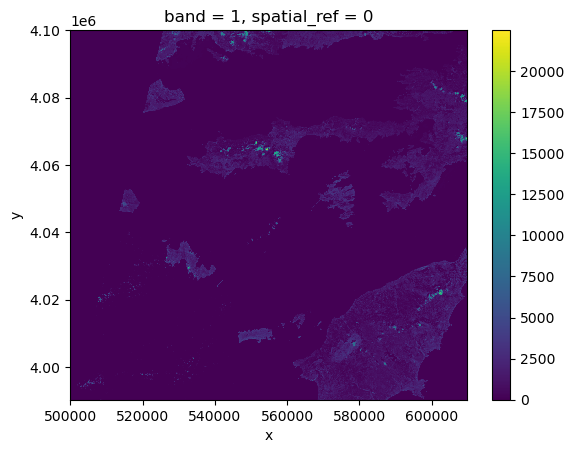

In [8]:
red.plot()

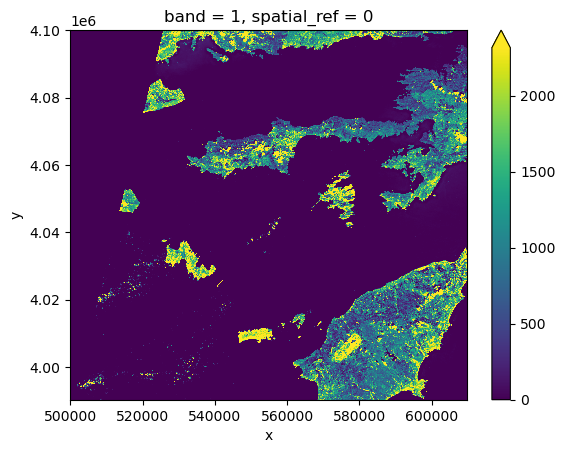

In [10]:
red.plot(robust=True)

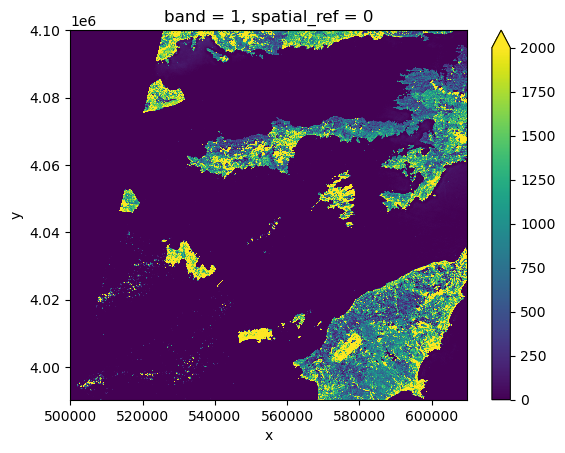

In [11]:
red.plot(vmin=0, vmax=2000)

In [12]:
red.rio.crs

CRS.from_epsg(32635)

In [13]:
import pyproj

In [14]:
epsg = red.rio.crs.to_epsg()

In [15]:
crs = pyproj.CRS(epsg)

In [16]:
crs

<Projected CRS: EPSG:32635>
Name: WGS 84 / UTM zone 35N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 24°E and 30°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Bulgaria. Central African Republic. Democratic Republic of the Congo (Zaire). Egypt. Estonia. Finland. Greece. Latvia. Lesotho. Libya. Lithuania. Moldova. Norway. Poland. Romania. Russian Federation. Sudan. Svalbard. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (24.0, 0.0, 30.0, 84.0)
Coordinate Operation:
- name: UTM zone 35N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
red_nodata = rioxarray.open_rasterio('red.tif', overview_level=2, masked=True)

In [18]:
red_nodata

<xarray.DataArray (band: 1, y: 1372, x: 1372)>
[1882384 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5e+05 5.001e+05 5.002e+05 ... 6.097e+05 6.097e+05
  * y            (y) float64 4.1e+06 4.1e+06 4.1e+06 ... 3.99e+06 3.99e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0

In [19]:
red_nodata.values

array([[[nan, nan, nan, ..., 28., 29., 38.],
        [nan, nan, nan, ..., 20., 35., 45.],
        [nan, nan, nan, ...,  4., 15., 32.],
        ...,
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.]]], dtype=float32)

In [20]:
red.values

array([[[ 0,  0,  0, ..., 28, 29, 38],
        [ 0,  0,  0, ..., 20, 35, 45],
        [ 0,  0,  0, ...,  4, 15, 32],
        ...,
        [ 0,  0,  0, ...,  1,  1,  1],
        [ 0,  0,  0, ...,  1,  1,  1],
        [ 0,  0,  0, ...,  1,  1,  1]]], dtype=uint16)

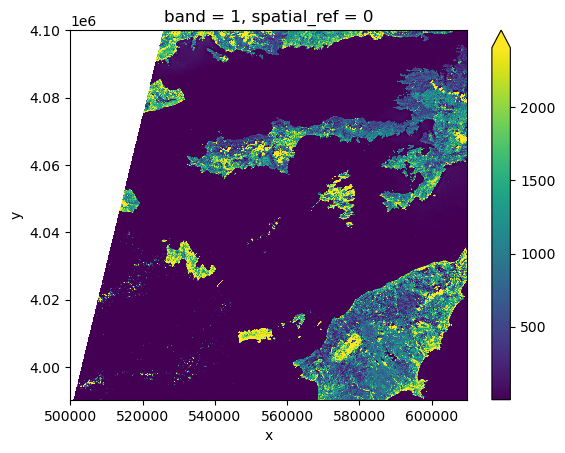

In [21]:
red_nodata.plot(robust=True)

In [22]:
import pystac
items = pystac.ItemCollection.from_file('rhodes_sentinel-2.json')

In [27]:
visual_href = items[0].assets['visual'].href

In [34]:
visual = rioxarray.open_rasterio(visual_href, overview_level=2, masked=True)

In [35]:
visual

<xarray.DataArray (band: 3, y: 1373, x: 1373)>
[5655387 values with dtype=float32]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 5e+05 5.001e+05 5.002e+05 ... 6.097e+05 6.097e+05
  * y            (y) float64 4.1e+06 4.1e+06 4.1e+06 ... 3.99e+06 3.99e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0

In [36]:
visual.shape

(3, 1373, 1373)

(array([781403., 261636., 268083., 201801., 148191., 111619.,  74377.,
         52921.,  34929.,  48430.]),
 array([  1.        ,  26.39999962,  51.79999924,  77.19999695,
        102.59999847, 128.        , 153.3999939 , 178.80000305,
        204.19999695, 229.6000061 , 255.        ]),
 <BarContainer object of 10 artists>)

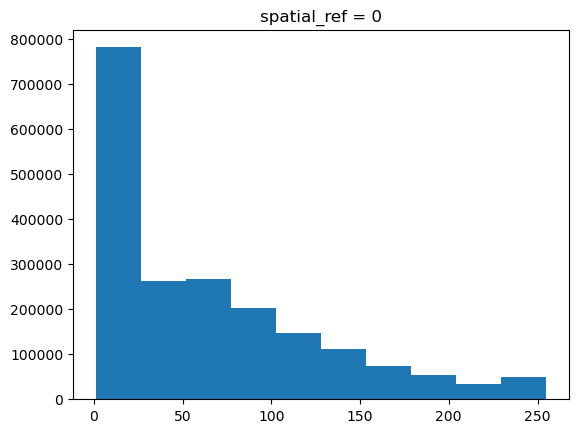

In [37]:
visual.plot()

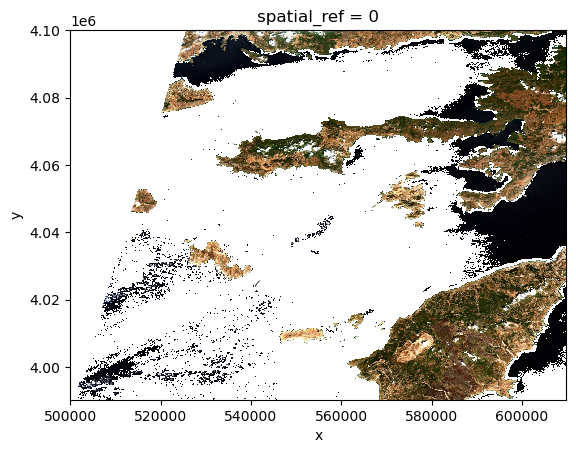

In [39]:
(visual / 255).plot.imshow()